In [1]:
pip install mendeleev

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from mendeleev import element

In [3]:
##creating Atom class
class Atom:
    def __init__(self, atType, symbol, userNum, coords):
        self.atType = atType
        self.symbol = symbol
        self.userNum = userNum
        self.coords = coords
        xyz = coords.split()
        self.xcoord = float(xyz[0])
        self.ycoord = float(xyz[1])
        self.zcoord = float(xyz[2])
        
    def __repr__(self):
        return "Atom: atType: {}, symbol: {}, userNum: {}, coords: {}".format(self.atType, self.symbol, self.userNum, self.coords)

In [4]:
##creating Bond class
class Bond:
    def __init__(self, bondAtom1, bondAtom2, bondOrderType, bondOrder):
        self.bondAtom1 = bondAtom1
        self.bondAtom2 = bondAtom2
        self.bondOrderType = bondOrderType
        self.bondOrder = bondOrder
        
    def __repr__(self):
        return " Bond: bondAtom1: {}, bondAtom2: {}, bondOrderType: {}, bondOrder: {}".format(self.bondAtom1, self.bondAtom2, self.bondOrderType, self.bondOrder)

In [5]:
##creating Molecule class
class Molecule:
    
    ##initializer with option to parse c3xml file
    def __init__(self, file=None):
        self.atoms = dict()
        self.bonds = dict()
        if file == None:
            pass
            ##creates empty molecule, atoms and bonds can be added later on
        else:
            tree = ET.parse(file)
            root = tree.getroot()
            for atom in root.iter('atom'):
                id = atom.attrib['id']
                atType = atom.attrib['atType']
                symbol = atom.attrib['symbol']
                userNum = atom.attrib['userNum']
                coords = atom.attrib['cartCoords']
                self.atoms[id] = Atom(atType, symbol, userNum, coords)
            for bond in root.iter('bond'):
                id = bond.attrib['id']
                bondAtom1 = bond.attrib['bondAtom1']
                bondAtom2 = bond.attrib['bondAtom2']
                bondOrderType = bond.attrib['bondOrderType']
                bondOrder = bond.attrib['bondOrder']
                self.bonds[id] = Bond(bondAtom1, bondAtom2, bondOrderType, bondOrder)
    
    def __repr__(self):
        return "Atoms: {}, Bonds: {}".format(self.atoms.keys(), self.bonds.keys())
    
    def bond_atom1(self, bond):
        return self.bonds[bond].bondAtom1
    
    def bond_atom2(self, bond):
        return self.bonds[bond].bondAtom2
    
    def bond_atom1_info(self, bond):
        return self.atoms[self.bonds[bond].bondAtom1]
    
    def bond_atom2_info(self, bond):
        return self.atoms[self.bonds[bond].bondAtom2]
    
    def plot(self):
        fig = plt.figure(figsize = (20,15))
        ax = plt.axes(projection = '3d')
    
        x = np.array([])
        y = np.array([])
        z = np.array([])
        
        symbol_colors = {'C': 'black', 'H': 'gray', 'O': 'red', 'N': 'blue', "Cl": 'green', 'S': 'yellow', 'P': 'orange', 'F': 'indigo'}
        
        atoms_dict_x = dict()
        atoms_dict_y = dict()
        atoms_dict_z = dict()
        for atom in self.atoms:
            if self.atoms[atom].symbol not in atoms_dict_x.keys():
                atoms_dict_x[self.atoms[atom].symbol] = np.array([])
                atoms_dict_y[self.atoms[atom].symbol] = np.array([])
                atoms_dict_z[self.atoms[atom].symbol] = np.array([])
            else:
                pass
            atoms_dict_x[self.atoms[atom].symbol] = np.append(atoms_dict_x[self.atoms[atom].symbol], self.atoms[atom].xcoord)
            atoms_dict_y[self.atoms[atom].symbol] = np.append(atoms_dict_y[self.atoms[atom].symbol], self.atoms[atom].ycoord)
            atoms_dict_z[self.atoms[atom].symbol] = np.append(atoms_dict_z[self.atoms[atom].symbol], self.atoms[atom].zcoord)
        for symbol in atoms_dict_x.keys():
            if symbol != 'Lp':
                if symbol in symbol_colors.keys():
                    color = symbol_colors[symbol]
                else:
                    color = 'magenta'
                size = 5 * element(symbol).atomic_radius
                ax.scatter(atoms_dict_x[symbol], atoms_dict_y[symbol], atoms_dict_z[symbol], s = size, c = color)
        ##plotting atoms
    
        bond_width = {'0':0,'1': 2, "2":6, "3":12}
        for bond in self.bonds:
            xb = np.array([])
            yb = np.array([])
            zb = np.array([])
            xb = np.append(xb, self.atoms[self.bonds[bond].bondAtom1].xcoord)
            xb = np.append(xb, self.atoms[self.bonds[bond].bondAtom2].xcoord)
            yb = np.append(yb, self.atoms[self.bonds[bond].bondAtom1].ycoord)
            yb = np.append(yb, self.atoms[self.bonds[bond].bondAtom2].ycoord)
            zb = np.append(zb, self.atoms[self.bonds[bond].bondAtom1].zcoord)
            zb = np.append(zb, self.atoms[self.bonds[bond].bondAtom2].zcoord)
            ax.plot(xb, yb, zb, linewidth = bond_width[self.bonds[bond].bondOrder], c = 'gray')
        
    
    ##returns atoms & bonds one hop from given atom, used later to construct the k-hop method
    def one_hop(self, atom):
        one_hop = []
        one_hop.append(atom)
        one_hop_bonds = []
        for bond in self.bonds.keys():
            if self.bond_atom1(bond) == atom:
                one_hop.append(self.bond_atom2(bond))
                one_hop_bonds.append(bond)
            elif self.bond_atom2(bond) == atom:
                one_hop.append(self.bond_atom1(bond))
                one_hop_bonds.append(bond)
        return one_hop, one_hop_bonds
    
    ##built this first to use as a guide to build k-hop method
    #def two_hop(self, atom):
        #atoms, bonds = self.one_hop(atom)
        #two_hop = []
        #two_hop_bonds = []
        #for atom in atoms:
            #two_hop.append(atom)
        #for bond in bonds:
            #two_hop_bonds.append(bond)
        #for i in atoms:
            #a, b = self.one_hop(i)
            #for atom in a:
                #if atom not in two_hop:
                    #two_hop.append(atom)
            #for bond in b:
                #if bond not in two_hop_bonds:
                    #two_hop_bonds.append(bond)
        #return two_hop, two_hop_bonds
    
    ##returns molecule with all atoms, bonds in a k-hop neighborhood of an atom
    def k_hop(self, atom, k):
        k_atoms, k_bonds = self.one_hop(atom)
        new_atoms = []
        new_bonds = []
        for iter in range(k-1):
            for i in k_atoms:
                atoms, bonds = self.one_hop(i)
                for atom in atoms:
                    if atom not in k_atoms and atom not in new_atoms:
                        new_atoms.append(atom)
                for bond in bonds:
                    if bond not in k_bonds and bond not in new_bonds:
                        new_bonds.append(bond) 
            for a in new_atoms:
                k_atoms.append(a)
            for b in new_bonds:
                k_bonds.append(b)
            new_atoms = []
            new_bonds = []
        new_molecule = Molecule()
        for atom in k_atoms:
            new_molecule.atoms[atom] = self.atoms[atom]
        for bond in k_bonds:
            new_molecule.bonds[bond] = self.bonds[bond]
        return new_molecule

    

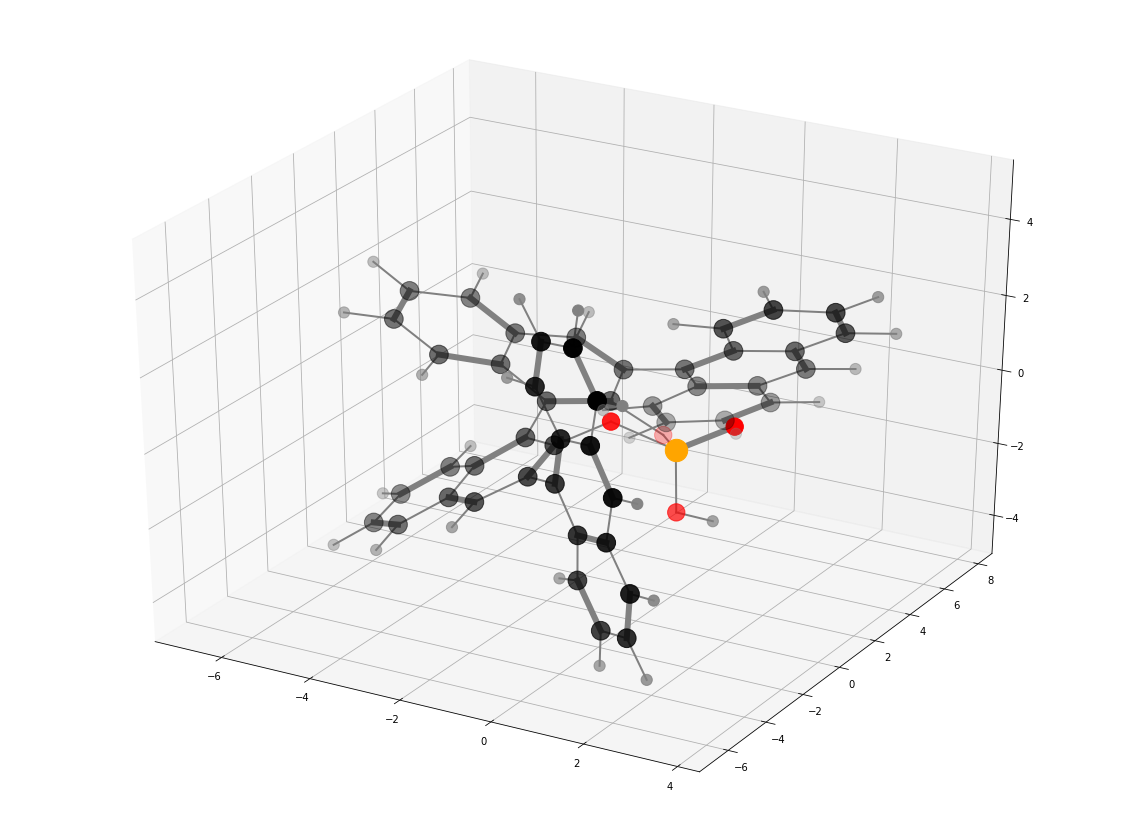

In [6]:
test = Molecule("test.c3xml")
test.plot()

In [19]:
import os
from os import listdir
from os.path import isfile, join
import glob

In [28]:
arr = os.listdir('brandeis_chem_research/ChemGroups3D')
print(arr)
for folder in arr:
    foldername = 'brandeis_chem_research/ChemGroups3D/' + folder
    files = os.listdir(foldername)
    for file in files:
        yo = Molecule(foldername + '/' + file)
        print(yo)
    

['Addition of enecarbamates to benzoyl imines', 'Addition of thiols to imines (Denmark)', 'Hydrogenation of fluorinated alkynyl ketimines', 'Reduction amination of N-aryl imines', 'Reductive amination of aliphatic ketones by benzothiazoline', 'Strecker Reaction (with ketimines)', 'Transfer Hydrogenation of ethyl ketimines', 'Transfer Hydrogenation of N-aryl imines (Rueping)', 'Transfer Hydrogenation of N-aryl imines by benzothiazoline', 'Transfer Hydrogenation of trifluoromethyl ketimines']
Atoms: dict_keys(['19', '9', '10', '12', '29', '31', '33', '35', '37', '40', '42', '150', '44', '46', '49', '51', '53', '55', '58', '60', '62', '64', '66', '69', '72', '75', '78', '81', '84', '140', '142', '144', '146', '148', '152', '14', '86', '68', '90', '92', '94', '71', '98', '100', '102', '74', '105', '107', '77', '80', '83', '113', '116', '118', '25', '172', '17', '122', '28', '125', '23', '128', '130', '132', '135', '137', '6', '7', '16', '154', '156', '158', '160', '162', '164', '166', '168

Atoms: dict_keys(['6', '7', '9', '11', '13', '15', '17', '19', '21', '23', '25', '28', '30', '32', '34', '36', '39', '41', '43', '45', '47', '49', '51', '53', '55', '57', '59', '60', '62', '64']), Bonds: dict_keys(['5', '8', '10', '12', '14', '16', '18', '20', '22', '24', '26', '27', '29', '31', '33', '35', '37', '38', '40', '42', '44', '46', '48', '50', '52', '54', '56', '58', '61', '63', '65'])
Atoms: dict_keys(['6', '7', '9', '11', '13', '15', '23', '25', '27', '29', '31', '17', '35', '20', '38', '40', '18', '21', '43', '45', '47', '49', '51', '53', '55', '57', '59', '60', '62', '64']), Bonds: dict_keys(['5', '8', '10', '12', '14', '16', '19', '22', '24', '26', '28', '30', '32', '33', '34', '36', '37', '39', '41', '42', '44', '46', '48', '50', '52', '54', '56', '58', '61', '63', '65'])
Atoms: dict_keys(['6', '7', '9', '11', '13', '15', '23', '25', '27', '29', '31', '17', '35', '20', '38', '40', '18', '21', '43', '45', '47', '49', '51', '53', '55', '57', '59', '60', '62', '64']), Bon

Atoms: dict_keys(['6', '7', '18', '20', '23', '25', '27', '30', '32', '35', '37', '39', '41', '43', '45', '15', '13', '9', '11', '34', '49', '29', '55', '22', '54', '17', '58', '60', '62', '64']), Bonds: dict_keys(['5', '8', '10', '12', '14', '16', '19', '21', '24', '26', '28', '31', '33', '36', '38', '40', '42', '44', '46', '47', '48', '50', '51', '52', '53', '56', '57', '59', '61', '63', '65'])
Atoms: dict_keys(['6', '7', '18', '20', '23', '25', '27', '30', '32', '35', '37', '39', '41', '43', '45', '15', '13', '9', '11', '34', '49', '29', '55', '22', '54', '17', '58', '60', '62', '64']), Bonds: dict_keys(['5', '8', '10', '12', '14', '16', '19', '21', '24', '26', '28', '31', '33', '36', '38', '40', '42', '44', '46', '47', '48', '50', '51', '52', '53', '56', '57', '59', '61', '63', '65'])
Atoms: dict_keys(['18', '19', '9', '22', '24', '6', '7', '10', '12', '14', '16', '28', '30', '32', '34', '36', '38', '40', '41', '43']), Bonds: dict_keys(['5', '8', '11', '13', '15', '17', '20', '21',

Atoms: dict_keys(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '151', '153', '155', '157', '159', '161', '163', '165']), Bonds: dict_keys(['75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148'

Atoms: dict_keys(['14', '9', '10', '12', '16', '29', '31', '18', '36', '19', '55', '58', '6', '66', '39', '41', '43', '45', '47', '49', '51', '53', '56', '59', '7', '34', '21', '23', '25', '27', '61', '68', '70']), Bonds: dict_keys(['5', '8', '11', '13', '15', '17', '20', '22', '24', '26', '28', '30', '32', '33', '35', '37', '38', '40', '42', '44', '46', '48', '50', '52', '54', '57', '60', '62', '63', '64', '65', '67', '69', '71'])
Atoms: dict_keys(['9', '11', '7', '6', '13']), Bonds: dict_keys(['5', '8', '10', '12'])
Atoms: dict_keys(['21', '19', '10', '13', '16', '7', '23', '25', '27', '6', '39', '41', '43', '45', '46', '15', '12', '33', '9', '30', '38', '18', '49', '51', '65', '67', '59', '57', '55', '61', '63', '69', '70', '72', '74']), Bonds: dict_keys(['5', '8', '11', '14', '17', '20', '22', '24', '26', '28', '29', '31', '32', '34', '35', '36', '37', '40', '42', '44', '47', '48', '50', '52', '53', '54', '56', '58', '60', '62', '64', '66', '68', '71', '73', '75'])
Atoms: dict_keys

In [39]:
TRASH
def plot(self):
        fig = plt.figure(figsize = (20,15))
        ax = plt.axes(projection = '3d')
    
        x = np.array([])
        y = np.array([])
        z = np.array([])
        
        symbol_colors = {'C': 'black', 'H': 'gray', 'O': 'red', 'N': 'blue', "Cl": 'green', 'S': 'yellow', 'P': 'orange', 'F': 'indigo'}
        
        atoms_dict_x = dict()
        atoms_dict_y = dict()
        atoms_dict_z = dict()
        for atom in self.atoms:
            if self.atoms[atom].symbol not in atoms_dict_x.keys():
                atoms_dict_x[self.atoms[atom].symbol] = np.array([])
                atoms_dict_y[self.atoms[atom].symbol] = np.array([])
                atoms_dict_z[self.atoms[atom].symbol] = np.array([])
            else:
                pass
            atoms_dict_x[self.atoms[atom].symbol] = np.append(atoms_dict_x[self.atoms[atom].symbol], self.atoms[atom].xcoord)
            atoms_dict_y[self.atoms[atom].symbol] = np.append(atoms_dict_y[self.atoms[atom].symbol], self.atoms[atom].ycoord)
            atoms_dict_z[self.atoms[atom].symbol] = np.append(atoms_dict_z[self.atoms[atom].symbol], self.atoms[atom].zcoord)
        for symbol in atoms_dict_x.keys():
            if symbol in symbol_colors.keys():
                color = symbol_colors[symbol]
            else:
                color = 'magenta'
            ax.scatter(atoms_dict_x[symbol], atoms_dict_y[symbol], atoms_dict_z[symbol], s = 200, c = color)
        ##plotting atoms
        #ax.scatter(x,y,z, s = 200, c = 'gray')
    
        for bond in self.bonds:
            xb = np.array([])
            yb = np.array([])
            zb = np.array([])
            xb = np.append(xb, self.atoms[self.bonds[bond].bondAtom1].xcoord)
            xb = np.append(xb, self.atoms[self.bonds[bond].bondAtom2].xcoord)
            yb = np.append(yb, self.atoms[self.bonds[bond].bondAtom1].ycoord)
            yb = np.append(yb, self.atoms[self.bonds[bond].bondAtom2].ycoord)
            zb = np.append(zb, self.atoms[self.bonds[bond].bondAtom1].zcoord)
            zb = np.append(zb, self.atoms[self.bonds[bond].bondAtom2].zcoord)
            #ax.plot(xb, yb, zb)

In [9]:
OG code
    def plot(self):
        fig = plt.figure(figsize = (20,15))
        ax = plt.axes(projection = '3d')
    
        x = np.array([])
        y = np.array([])
        z = np.array([])
        for atom in self.atoms:
            x = np.append(x, self.atoms[atom].xcoord)
            y = np.append(y, self.atoms[atom].ycoord)
            z = np.append(z, self.atoms[atom].zcoord)
        ##plotting atoms
        ax.scatter(x,y,z, s = 200, c = 'gray')
    
        for bond in self.bonds:
            xb = np.array([])
            yb = np.array([])
            zb = np.array([])
            xb = np.append(xb, self.atoms[self.bonds[bond].bondAtom1].xcoord)
            xb = np.append(xb, self.atoms[self.bonds[bond].bondAtom2].xcoord)
            yb = np.append(yb, self.atoms[self.bonds[bond].bondAtom1].ycoord)
            yb = np.append(yb, self.atoms[self.bonds[bond].bondAtom2].ycoord)
            zb = np.append(zb, self.atoms[self.bonds[bond].bondAtom1].zcoord)
            zb = np.append(zb, self.atoms[self.bonds[bond].bondAtom2].zcoord)
            ax.plot(xb, yb, zb)

SyntaxError: invalid syntax (<ipython-input-9-485b465e7779>, line 1)

In [164]:
TRASH
def k_hop(self, atom, k):
        list, k_bonds = self.one_hop(atom)
        new_nums = []
        for iter in range(k-1):
            for b in list:
                for a in self.one_hop(b):
                    if a not in list and a not in new_nums:
                        new_nums.append(a)
            for a in new_nums:
                list.append(a)
        return list
    
    
    def k_hop(self, atom, k):
        list, k_bonds = self.one_hop(atom)
        new_nums = []
        new_bonds = []
        for iter in range(k-1):
            for b in list:
                for a,c in self.one_hop(b):
                    if a not in list and a not in new_nums:
                        new_nums.append(a)
                    if c not in k_bonds and c not in new_bonds:
                        new_bonds.append(c)
            for a,c in new_nums, new_bonds:
                list.append(a)
                k_bonds.append(c)
        return list, k_bonds

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [ ]:
TRASH

class Atom:
    def __init__(self, atType, symbol, userNum, coords):
        self.atType = atType
        self.symbol = symbol
        self.userNum = userNum
        self.coords = coords
        
    def __repr__(self):
        return "Atom: atType: {}, symbol: {}, userNum: {}, coords: {}".format(self.atType, self.symbol, self.userNum, self.coords)

class Bond:
    def __init__(self, bondAtom1, bondAtom2, bondOrderType, bondOrder):
        self.bondAtom1 = bondAtom1
        self.bondAtom2 = bondAtom2
        self.bondOrderType = bondOrderType
        self.bondOrder = bondOrder
        
    def __repr__(self):
        return "Bond: bondAtom1: {}, bondAtom2: {}, bondOrderType: {}, bondOrder: {}".format(self.bondAtom1, self.bondAtom2, self.bondOrderType, self.bondOrder)

class Molecule:
    
    atoms = dict()
    bonds = dict()
    
    def __init__(self, file):
        tree = ET.parse(file)
        root = tree.getroot()
        for atom in root.iter('atom'):
            id = atom.attrib['id']
            atType = atom.attrib['atType']
            symbol = atom.attrib['symbol']
            userNum = atom.attrib['userNum']
            coords = atom.attrib['cartCoords']
            self.atoms[id] = Atom(atType, symbol, userNum, coords)
        for bond in root.iter('bond'):
            id = bond.attrib['id']
            bondAtom1 = bond.attrib['bondAtom1']
            bondAtom2 = bond.attrib['bondAtom2']
            bondOrderType = bond.attrib['bondOrderType']
            bondOrder = bond.attrib['bondOrder']
            self.bonds[id] = Bond(bondAtom1, bondAtom2, bondOrderType, bondOrder)
            
    def bond_atom1_info(self, bond):
        return self.atoms[self.bonds[bond].bondAtom1]
    
    def bond_atom2_info(self, bond):
        return self.atoms[self.bonds[bond].bondAtom2]
    
    def bond_atom1(self, bond):
        return self.bonds[bond].bondAtom1
    
    def bond_atom2(self, bond):
        return self.bonds[bond].bondAtom2
    
    def one_hop(self, atom):
        one_hop = []
        one_hop.append(atom)
        one_hop_bonds = []
        for bond in self.bonds.keys():
            if self.bond_atom1(bond) == atom:
                one_hop.append(self.bond_atom2(bond))
                one_hop_bonds.append(bond)
            elif self.bond_atom2(bond) == atom:
                one_hop.append(self.bond_atom1(bond))
                one_hop_bonds.append(bond)
        return one_hop, one_hop_bonds
    
    def two_hop(self, atom):
        atoms, bonds = self.one_hop(atom)
        two_hop = []
        two_hop_bonds = []
        for atom in atoms:
            two_hop.append(atom)
        for bond in bonds:
            two_hop_bonds.append(bond)
        for i in atoms:
            a, b = self.one_hop(i)
            for atom in a:
                if atom not in two_hop:
                    two_hop.append(atom)
            for bond in b:
                if bond not in two_hop_bonds:
                    two_hop_bonds.append(bond)
        return two_hop, two_hop_bonds
        
    def k_hop(self, atom, k):
        k_atoms, k_bonds = self.one_hop(atom)
        new_atoms = []
        new_bonds = []
        for iter in range(k-1):
            for i in k_atoms:
                atoms, bonds = self.one_hop(i)
                for atom in atoms:
                    if atom not in k_atoms and atom not in new_atoms:
                        new_atoms.append(atom)
                for bond in bonds:
                    if bond not in k_bonds and bond not in new_bonds:
                        new_bonds.append(bond) 
            for a in new_atoms:
                k_atoms.append(a)
            for b in new_bonds:
                k_bonds.append(b)
            new_atoms = []
            new_bonds = []
        
        new_molecule = 
    # make it molecule
    # add escriptions